Accuracy: 0.588256193275411

Classification Report:
               precision    recall  f1-score   support

         AFM       0.12      0.26      0.17       679
          FM       0.53      0.57      0.55     11427
         FiM       0.21      0.15      0.18      2266
          NM       0.72      0.68      0.70     16589

    accuracy                           0.59     30961
   macro avg       0.40      0.41      0.40     30961
weighted avg       0.60      0.59      0.59     30961



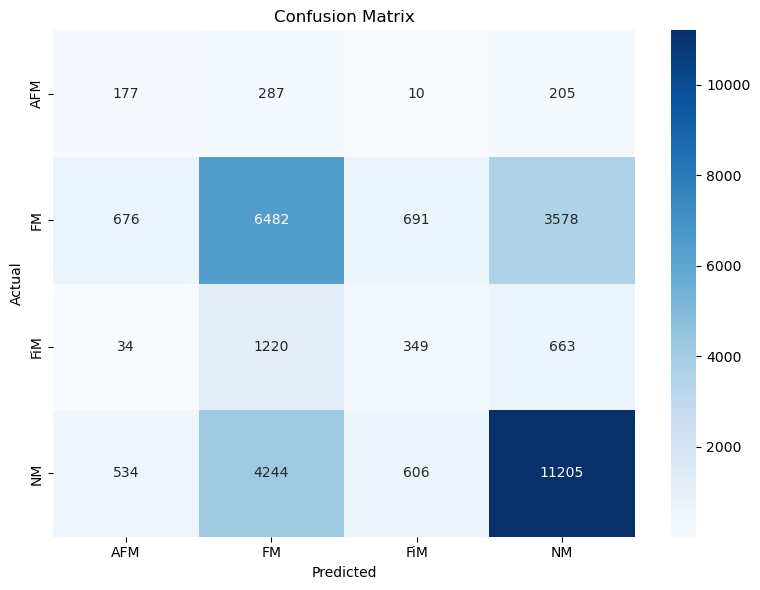

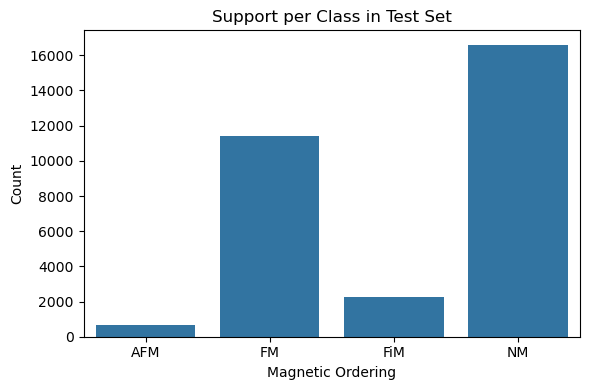

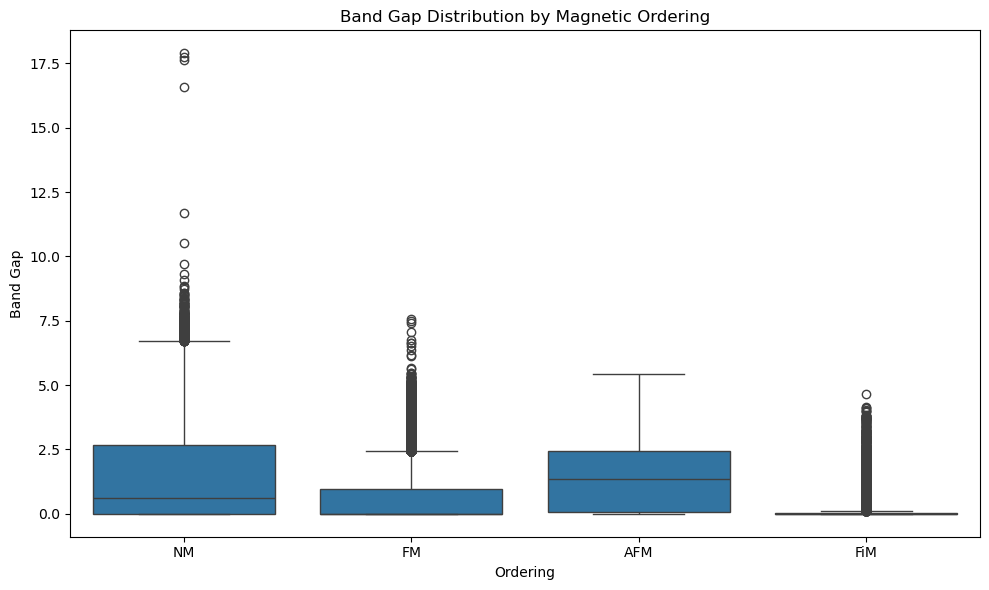

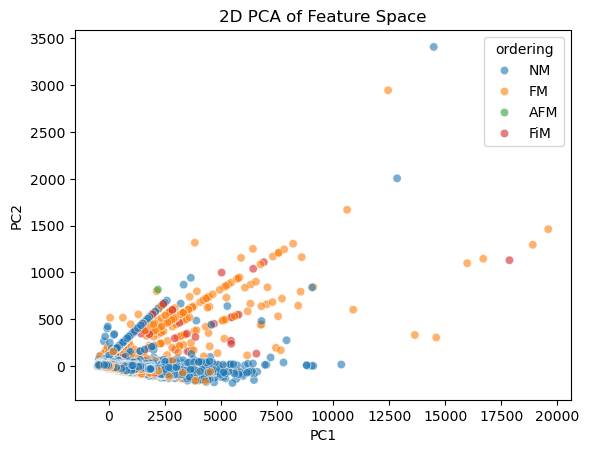

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("C:/Users/arrow/OneDrive/Documents/GitHub/data-science-summer-2025/data/All Data Imported.csv")

# Select features
features = [
    'band_gap', 'numberofelements', 'density_atomic', 'volume',
    'nsites', 'density', 'formation_energy_per_atom',
    'energy_above_hull', 'is_gap_direct', 'is_stable'
]

# Clean and prepare data
df_clean = df.dropna(subset=features + ['ordering'])
df_clean['is_gap_direct'] = df_clean['is_gap_direct'].astype(int)
df_clean['is_stable'] = df_clean['is_stable'].astype(int)

# Encode target variable
label_encoder = LabelEncoder()
df_clean['ordering_encoded'] = label_encoder.fit_transform(df_clean['ordering'])

X = df_clean[features]
y = df_clean['ordering_encoded']
class_names = label_encoder.classes_

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_names)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Plot 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot 2: Class distribution in test set
plt.figure(figsize=(6, 4))
sns.countplot(x=label_encoder.inverse_transform(y_test), order=class_names)
plt.title("Support per Class in Test Set")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot 3: Feature distribution for one or two top features
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['ordering'], y=df_clean['band_gap'])
plt.title("Band Gap Distribution by Magnetic Ordering")
plt.xlabel("Ordering")
plt.ylabel("Band Gap")
plt.tight_layout()
plt.show()

#2D PCA plot of feature space
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca['ordering'] = label_encoder.inverse_transform(y)
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="ordering", alpha=0.6)
plt.title("2D PCA of Feature Space")
plt.show()
